In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
filename = 'results.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id
0,mps,2,1,constant,0,120,144.005866,120,1.200049,0.833299,72.851390,3.596302,143.878713,130.316808,137.395344,141.857683,stabilityai/stable-diffusion-2
1,mps,2,2,constant,0,120,121.349828,120,1.011249,0.988877,61.839441,5.013196,121.323023,109.276463,116.400326,121.210499,stabilityai/stable-diffusion-2
2,mps,2,4,constant,0,120,110.086172,120,0.917385,1.090055,57.911711,7.849691,110.056937,100.857596,105.952244,107.598969,stabilityai/stable-diffusion-2
3,mps,2,8,constant,0,120,105.179134,120,0.876493,1.140911,58.759903,14.315933,105.150070,96.300549,104.645343,105.023682,stabilityai/stable-diffusion-2
4,default,2,1,constant,0,120,207.835910,120,1.731966,0.577379,106.019842,4.808152,207.719589,189.882222,200.097987,205.580727,stabilityai/stable-diffusion-2


In [83]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]

Text(0, 0.5, 'Throughput (requests/s)')

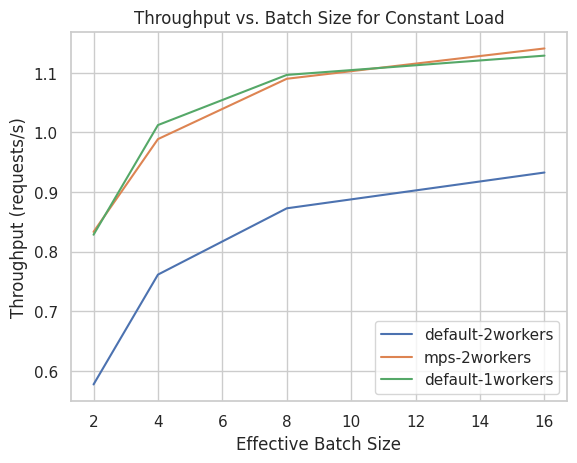

In [84]:
# graph throughput with respect to batchsize for both default, mps and constant, poisson
sns.set(style="whitegrid")

fig, ax = plt.subplots()
sns.lineplot(x='eff_batch_size', y='throughput', data=df[
    (df['compute_type'] == 'default') & 
    (df['experiment_type'] == 'constant') &
    (df['num_workers'] == 2)], label='default-2workers', ax=ax)
sns.lineplot(x='eff_batch_size', y='throughput', data=df[(
    df['compute_type'] == 'mps') & 
    (df['experiment_type'] == 'constant')&
    (df['num_workers'] == 2)], label='mps-2workers', ax=ax)
sns.lineplot(x='eff_batch_size', y='throughput', data=df[(
    df['compute_type'] == 'default') & 
    (df['experiment_type'] == 'constant')&
    (df['num_workers'] == 1)], label='default-1workers', ax=ax)
# sns.lineplot(x='batch_size', y='throughput', data=df[
#     (df['compute_type'] == 'multiple_gpu') &
#     (df['experiment_type'] == 'constant') &
#     (df['num_workers'] == 2)], label='multiple_gpu-2workers', ax=ax)
# sns.lineplot(x='batch_size', y='throughput', data=df[
#     (df['compute_type'] == 'default') & 
#     (df['experiment_type'] == 'constant') &
#     (df['num_workers'] == 4)], label='default-4workers', ax=ax)
# sns.lineplot(x='batch_size', y='throughput', data=df[(
#     df['compute_type'] == 'mps') & 
#     (df['experiment_type'] == 'constant')&
#     (df['num_workers'] == 4)], label='mps-4workers', ax=ax)
# sns.lineplot(x='batch_size', y='throughput', data=df[
#     (df['compute_type'] == 'multiple_gpu') &
#     (df['experiment_type'] == 'constant') &
#     (df['num_workers'] == 4)], label='multiple_gpu-4workers', ax=ax)
plt.title('Throughput vs. Batch Size for Constant Load')
plt.xlabel('Effective Batch Size')
plt.ylabel('Throughput (requests/s)')

Text(0, 0.5, 'Avg Latency (s)')

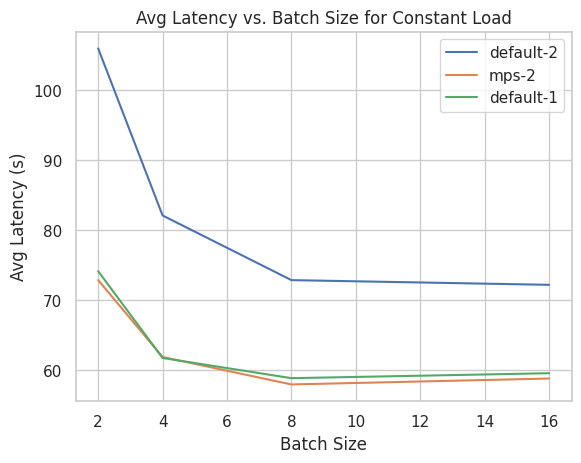

In [85]:
fig, ax = plt.subplots()
sns.lineplot(x='eff_batch_size', y='average_latency', data=df[
    (df['compute_type'] == 'default') & 
    (df['experiment_type'] == 'constant') &
    (df['num_workers'] == 2)], label='default-2', ax=ax)
sns.lineplot(x='eff_batch_size', y='average_latency', data=df[(
    df['compute_type'] == 'mps') & 
    (df['experiment_type'] == 'constant')&
    (df['num_workers'] == 2)], label='mps-2', ax=ax)
# sns.lineplot(x='batch_size', y='average_latency', data=df[
#     (df['compute_type'] == 'multiple_gpu') &
#     (df['experiment_type'] == 'constant') &
#     (df['num_workers'] == 2)], label='multiple_gpu-2', ax=ax)
sns.lineplot(x='eff_batch_size', y='average_latency', data=df[
    (df['compute_type'] == 'default') & 
    (df['experiment_type'] == 'constant') &
    (df['num_workers'] == 1)], label='default-1', ax=ax)
# sns.lineplot(x='batch_size', y='average_latency', data=df[(
#     df['compute_type'] == 'mps') & 
#     (df['experiment_type'] == 'constant')&
#     (df['num_workers'] == 4)], label='mps-4', ax=ax)
# sns.lineplot(x='batch_size', y='average_latency', data=df[
#     (df['compute_type'] == 'multiple_gpu') &
#     (df['experiment_type'] == 'constant') &
#     (df['num_workers'] == 4)], label='multiple_gpu-4', ax=ax)
plt.title('Avg Latency vs. Batch Size for Constant Load')
plt.xlabel('Batch Size')
plt.ylabel('Avg Latency (s)')

In [86]:
# graph throughput with respect to batchsize for both default, mps and constant, poisson
sns.set(style="whitegrid")
def visualize(model_id):
    fig, ax = plt.subplots()
    sns.lineplot(x='eff_batch_size', y='throughput', data=df[
        (df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson') &
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='default-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='throughput', data=df[(
        df['compute_type'] == 'mps') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='mps-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='throughput', data=df[(
        df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 1) &
        (df['model_id'] == model_id)], label='default-1workers', ax=ax)
    plt.title(f'Throughput vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Throughput (requests/s)')
    plt.show()
    fig, ax = plt.subplots()
    sns.lineplot(x='eff_batch_size', y='average_latency', data=df[
        (df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson') &
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='default-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='average_latency', data=df[(
        df['compute_type'] == 'mps') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='mps-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='average_latency', data=df[(
        df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 1) &
        (df['model_id'] == model_id)], label='default-1workers', ax=ax)
    plt.title(f'Latency Avg vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency Avg (requests/s)')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.lineplot(x='eff_batch_size', y='latency_99', data=df[
        (df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson') &
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='default-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='latency_99', data=df[(
        df['compute_type'] == 'mps') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 2) &
        (df['model_id'] == model_id)], label='mps-2workers', ax=ax)
    sns.lineplot(x='eff_batch_size', y='latency_99', data=df[(
        df['compute_type'] == 'default') & 
        (df['experiment_type'] == 'poisson')&
        (df['num_workers'] == 1) &
        (df['model_id'] == model_id)], label='default-1workers', ax=ax)
    plt.title(f'Latench 99% vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency 99% (requests/s)')
    plt.show()

In [87]:
# bs 1: 8214 MB
# bs 2: 12282 MB
# bs 4: 18586 MB
# bs 8: 31074 MB
# mps: + 30 MB

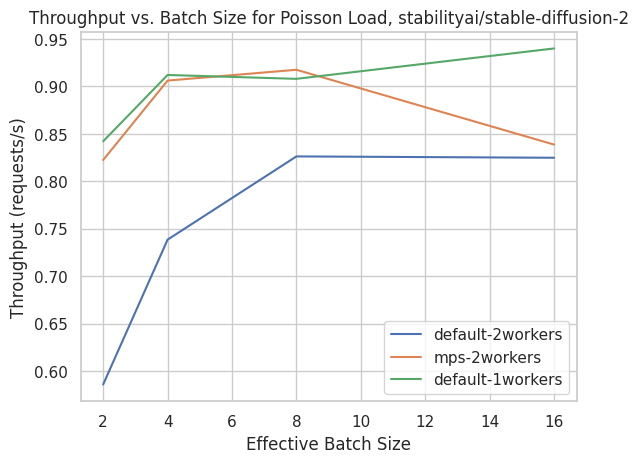

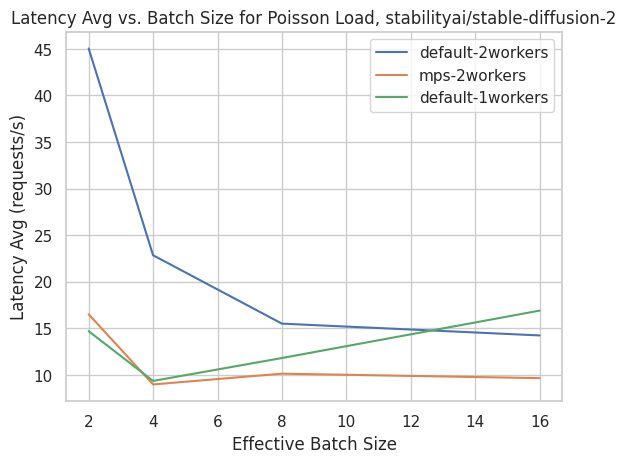

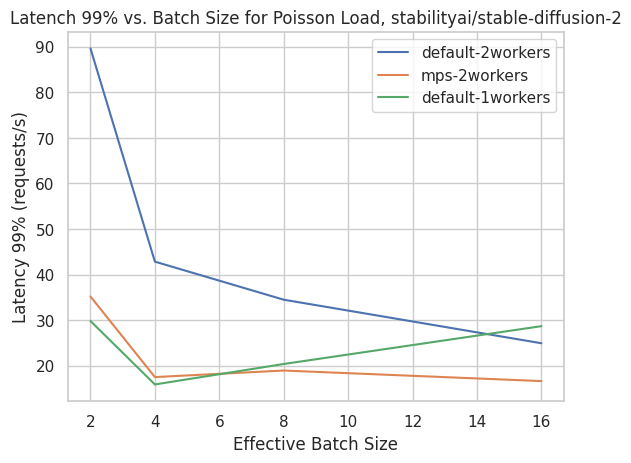

In [88]:
visualize("stabilityai/stable-diffusion-2")

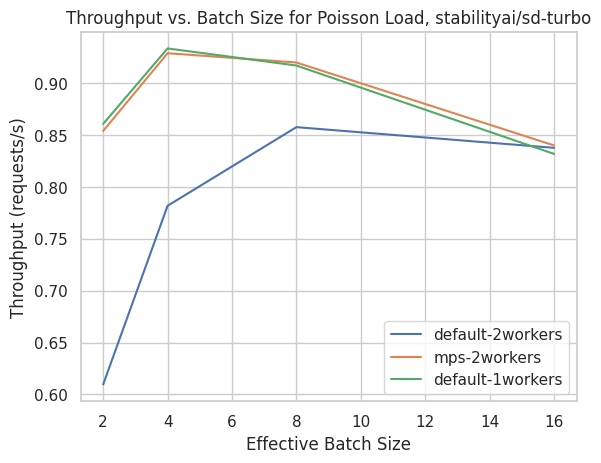

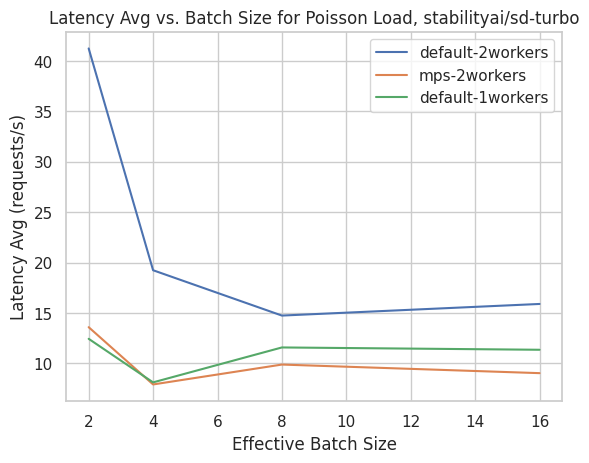

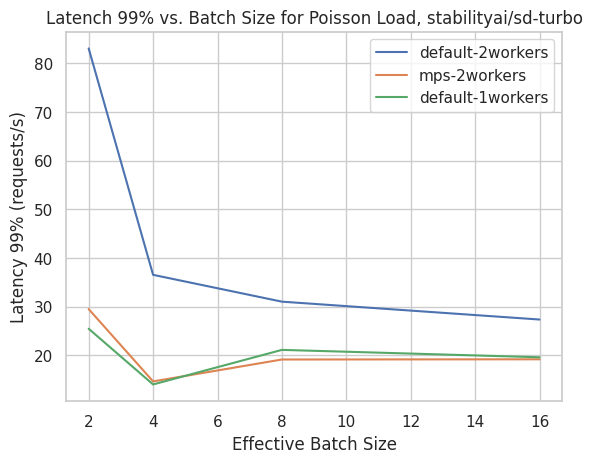

In [89]:
visualize("stabilityai/sd-turbo")

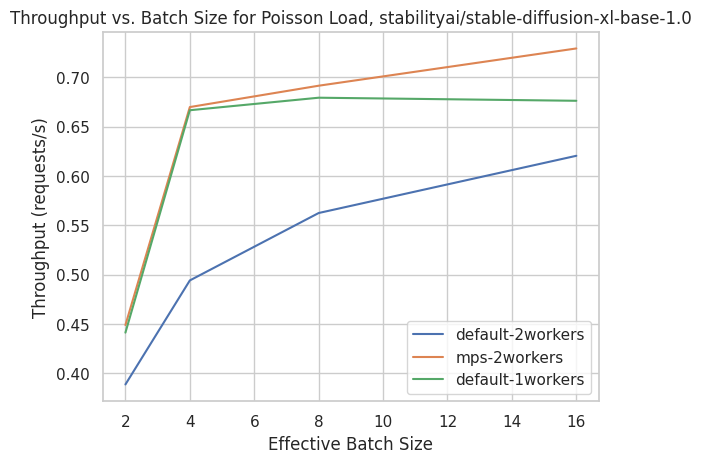

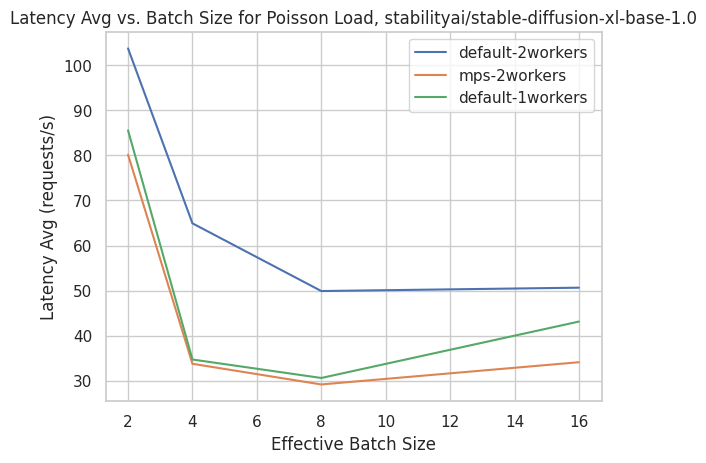

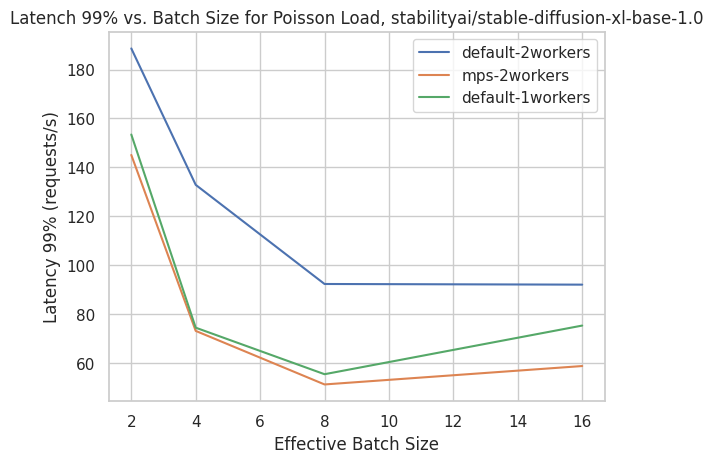

In [90]:
visualize("stabilityai/stable-diffusion-xl-base-1.0")